In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **1)**

Se extrae un país al azar

In [2]:
h=pd.read_json('https://datahub.io/core/country-list/r/data.json')
h

,Code,Name
0,AF,Afghanistan
1,AX,Åland Islands
2,AL,Albania
3,DZ,Algeria
4,AS,American Samoa
...,...,...
244,WF,Wallis and Futuna
245,EH,Western Sahara
246,YE,Yemen
247,ZM,Zambia


In [3]:
np.random.seed(0)
pais=np.random.randint(0,248)
print('el país es:', h.Name[pais])

el país es: Paraguay


## **a)**

Se escoge la primera institución con publicaciones

In [4]:
inst=pd.read_json('https://inspirehep.net/api/institutions?q=paraguay')
l=inst.hits.hits
institucion=''
for i in range(0,len(l)):
  if l[i]['metadata']['number_of_papers'] > 0:
    institucion=l[i]['metadata']['legacy_ICN']
    break
print('La universidad es:', institucion)

La universidad es: Asuncion Natl. U.


## **b)**

Se busca una publicación con menos de 10 autores

In [6]:
lit=pd.read_json('https://inspirehep.net/api/literature?sort=mostrecent&page=1&q=aff+Asuncion+Natl.+U.')
m=lit.hits.hits

In [7]:
g=[]
for i in range(len(lit)):
  if len(m[i]['metadata']['authors']) < 10:
    g=(m[i]['metadata']['authors'])
    break

## **c)**

Se extraen el último URL de cada autor

In [52]:
url=[]
for i in range(len(g)):
  url.append(g[i]['affiliations'][0]['record']['$ref'])

print(url)

['https://inspirehep.net/api/institutions/902796', 'https://inspirehep.net/api/institutions/905474', 'https://inspirehep.net/api/institutions/902796', 'https://inspirehep.net/api/institutions/902758', 'https://inspirehep.net/api/institutions/902796', 'https://inspirehep.net/api/institutions/902796']


## **d)**

Se construye una tabla con los datos proporcionados.


In [58]:
names=[]
for i in range(len(g)):
  names.append(g[i]['full_name'])

In [60]:
df=pd.DataFrame({'Nombre Completo':names,
                 'URL':url,
                 'Institución':institucion})

df

,Nombre Completo,URL,Institución
0,"Chavez, Claudio R.",https://inspirehep.net/api/institutions/902796,Asuncion Natl. U.
1,"Chierchie, Fernando",https://inspirehep.net/api/institutions/905474,Asuncion Natl. U.
2,"Sofo-Haro, Miguel",https://inspirehep.net/api/institutions/902796,Asuncion Natl. U.
3,"Lipovetzky, Jose",https://inspirehep.net/api/institutions/902758,Asuncion Natl. U.
4,"Fernandez-Moroni, Guillermo",https://inspirehep.net/api/institutions/902796,Asuncion Natl. U.
5,"Estrada, Juan",https://inspirehep.net/api/institutions/902796,Asuncion Natl. U.


# **2)**

## **a)** Definición del polinomio

In [65]:
np.random.seed(0)
r=[] #lista donde quedaran las raíces
for i in range(3):
  r.append(np.random.uniform(1,6)) #CC 1001010816
print('las racices son:')
for j in range(len(r)):
  print(r[j])

las racices son:
3.7440675196366238
4.5759468318620975
4.0138168803582195


In [66]:
p=np.poly1d(r,r=True)
print('El polinomio es:')
print(p)

El polinomio es:
   3         2
1 x - 12.33 x + 50.53 x - 68.77


## **b)** Puntos críticos

In [67]:
dp=np.polyder(p)
r2=dp.roots
print('Los puntos críticos son:')
for i in r2:
  print(i)

Los puntos críticos son:
4.356314261549608
3.866239893021685


## **c)** Máximos y mínimos

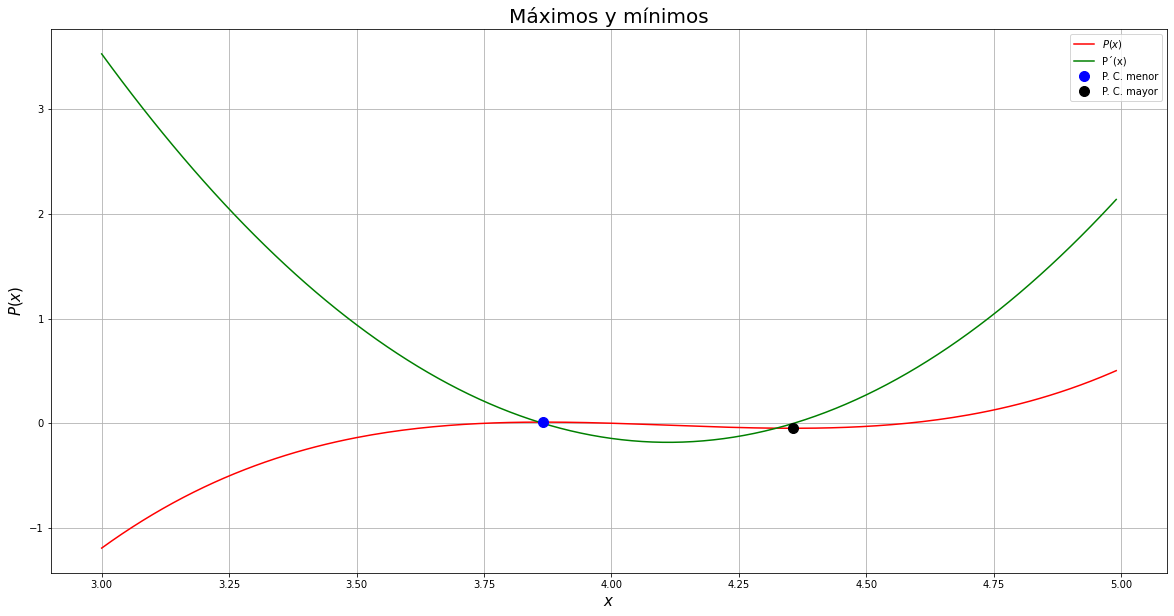

In [78]:
x=np.arange(3,5,0.01)
plt.figure(figsize=(20,10))
plt.title('Máximos y mínimos', size=20)
plt.plot(x,p(x),'r',label='$P(x)$')
plt.plot(x,dp(x),'g',label='P´(x)')
plt.plot(min(r2),p(min(r2)),'ob',markersize=10,label='P. C. menor')
plt.plot(max(r2),p(max(r2)),'ok',markersize=10,label='P. C. mayor')
plt.xlabel('$x$',size=15)
plt.ylabel('$P(x)$',size=15)
plt.legend()
plt.grid()
plt.show()

De la gráfica se puede ver que en este caso el punto crítico mayor ccorresponde a un mínimos global y el punto critíco menor a un máximo.

## **d)** Gráfica

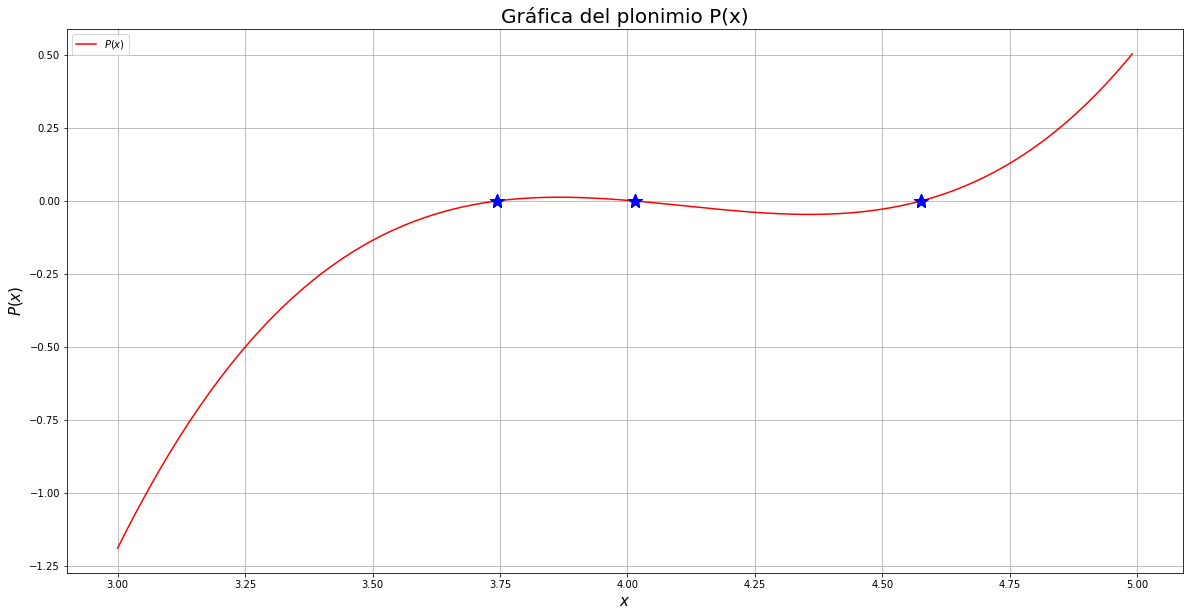

In [80]:
plt.figure(figsize=(20,10))
plt.title('Gráfica del plonimio P(x)',size=20)
plt.plot(x,p(x),'r',label='$P(x)$')
for i in range(len(r)):
  plt.plot(r,p(r),'*b',markersize=15)
plt.xlabel('$x$',size=15)
plt.ylabel('$P(x)$', size=15)
plt.legend()
plt.grid()
plt.show()

De la gráfica se puede notar que las raíces realmente corresponden a los puntos donde la función pasa por x=0